In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import ODESolve as ODE
import ODESolve_slow as ODEslow

In [2]:
#for the derivatives file

def vacuum(y, E, dm2, th):
    der= np.zeros(4)
    der[0] = 0
    der[1] = p[-1]/(2*p[-3])*(np.cos(2*p[-2])*y[2])
    der[2] = p[-1]/(2*p[-3])*((-np.cos(2*p[-2])*y[1]) - (np.sin(2*p[-2])*y[3]))
    der[3] = p[-1]/(2*p[-3])*(np.sin(2*p[-2])*y[2])
    return der

def f(x, y, p):
    der= np.zeros(4)
    der[:]= vacuum(y, p[0], p[-1], p[-2])
    return der


In [3]:
dm2 = 2              #p has the parameters that are specific to the problem
th = .5*np.arcsin(.8)
E = 1

p = np.zeros(3)

p[-1] = dm2
p[-2] = th
p[-3] = E


print(p)

x0 = 0                  #initial time 
y0 = np.zeros(4)
y0[:] = [1, 0, 0, 1]       # initial condition, 100% prob initially ve
dx0 = 0.01/.8
N_step = 100               #number of runge kutta steps 
dN = 1
x_final = 10            #final time 

[1.         0.46364761 2.        ]


In [4]:
x, y, dx, end = ODE.ODEOneRun(x0, y0, dx0, p, N_step, dN, x_final)

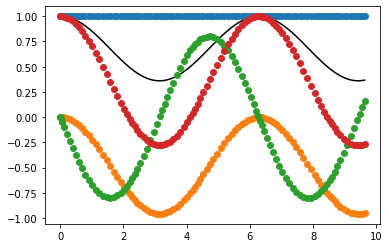

In [5]:
x_check = np.linspace(0,10,1000)
y_check = .5*y[:,0]*(1+y[:,3])


plt.figure()
plt.plot(x, y_check, color= 'black')
plt.plot(x, y, 'o')
plt.show()